In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
# 从 data.csv 中读取数据
data = pd.read_csv('data.csv', header=None)

data

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,200
0,24.40,24.12,23.85,23.59,23.34,23.10,22.88,22.67,22.46,22.27,...,179.52,181.44,183.37,185.31,187.26,189.23,191.20,193.19,195.19,197.20
1,24.32,24.04,23.77,23.51,23.27,23.03,22.81,22.60,22.39,22.21,...,178.75,180.66,182.58,184.52,186.46,188.42,190.38,192.36,194.35,196.35
2,24.25,23.97,23.70,23.44,23.19,22.96,22.74,22.53,22.33,22.14,...,177.99,179.89,181.80,183.73,185.66,187.61,189.57,191.54,193.52,195.51
3,24.17,23.89,23.63,23.37,23.13,22.89,22.67,22.46,22.26,22.07,...,177.23,179.12,181.02,182.94,184.86,186.80,188.75,190.71,192.68,194.67
4,24.10,23.82,23.56,23.30,23.06,22.83,22.61,22.40,22.20,22.01,...,176.47,178.35,180.24,182.15,184.07,186.00,187.94,189.89,191.85,193.83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,82.18,82.21,82.23,82.26,82.28,82.30,82.32,82.34,82.36,82.38,...,67.70,67.52,67.34,67.16,66.98,66.80,66.61,66.43,66.24,66.05
247,82.73,82.76,82.79,82.81,82.84,82.86,82.88,82.90,82.92,82.94,...,67.56,67.38,67.19,67.00,66.81,66.61,66.42,66.23,66.03,65.84
248,83.29,83.31,83.34,83.37,83.39,83.42,83.44,83.46,83.48,83.50,...,67.43,67.23,67.03,66.84,66.64,66.44,66.23,66.03,65.83,65.62
249,83.84,83.87,83.90,83.93,83.95,83.98,84.00,84.03,84.05,84.07,...,67.29,67.09,66.88,66.68,66.47,66.26,66.05,65.84,65.62,65.41


In [10]:
# 从 data 中提取出 x 和 y，以 (x, y, z) 的形式存储到 points 中
points = []
for i in range(0, 201):
	for j in range(0, 251):
		points.append([i*0.02, j*0.02, -data[i][j]])

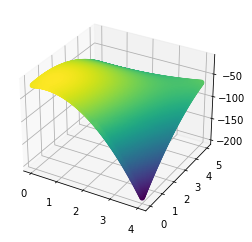

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制散点图，颜色映射为 viridis，标记为圆点
ax.scatter([p[0] for p in points], [p[1] for p in points], [p[2] for p in points], c=[p[2] for p in points], cmap='viridis', marker='o')

plt.show()


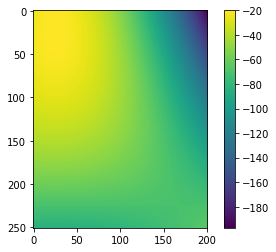

In [12]:
# 画出二维热力图，颜色深浅为单元格的值
plt.imshow(-data, cmap='viridis')
plt.colorbar()
plt.show()


In [13]:
# 用 2 元 3 次多项式拟合 points 中的数据
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = [[p[0], p[1]] for p in points]
y = [p[2] for p in points]

poly = PolynomialFeatures(degree=3)
X_ = poly.fit_transform(X)

clf = LinearRegression()
clf.fit(X_, y)

# 导出拟合的曲面的表达式
# from sympy import *
# x, y = symbols('x y')
# print(clf.intercept_)
# print(clf.coef_)
# print(clf.intercept_ + clf.coef_[1]*y + clf.coef_[2]*x + clf.coef_[3]*x**2 + clf.coef_[4]*x*y + clf.coef_[5]*y**2 + clf.coef_[6]*x**3 + clf.coef_[7]*x**2*y + clf.coef_[8]*x*y**2 + clf.coef_[9]*y**3)


LinearRegression()

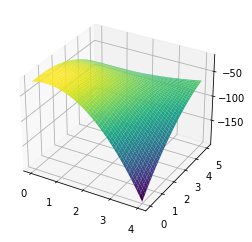

-24.400116787630587
[ 0.00000000e+00  1.44000195e+01  4.00002070e+00 -1.43999985e+01
 -3.20002856e+00 -3.19996953e+00  2.10479626e-06  3.19999440e+00
  9.70819088e-06 -7.41721123e-06]


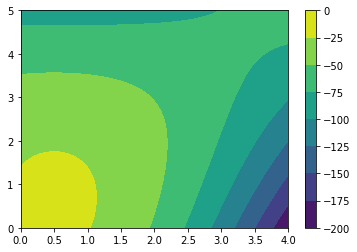

In [14]:
# 画出拟合的曲面
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.arange(0, 4.02, 0.02)
y = np.arange(0, 5.02, 0.02)
X, Y = np.meshgrid(x, y)
Z = clf.predict(poly.fit_transform(np.c_[X.ravel(), Y.ravel()]))
Z = Z.reshape(X.shape)

ax.plot_surface(X, Y, Z, cmap='viridis')

plt.show()

# 给出 Z 的解析式
print(clf.intercept_)
print(clf.coef_)

# 画出拟合的曲面的等高线图
plt.contourf(X, Y, Z, cmap='viridis')
plt.colorbar()
plt.show()


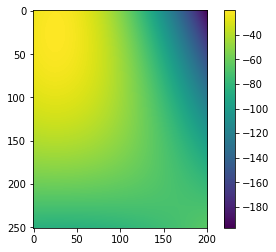

(251, 201) (251, 201)


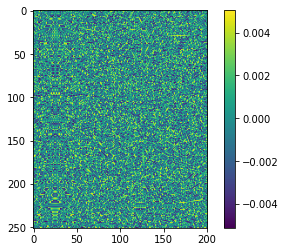

In [15]:
# 绘制拟合多项式的热力图以及与原始数据的差值热力图
plt.imshow(Z, cmap='viridis')
plt.colorbar()
plt.show()

print(data.shape, Z.shape)

Z_ = Z.copy()

for i in range(0, 251):
	for j in range(0, 201):
		Z_[i][j] += data[j][i]

plt.imshow(Z_, cmap='viridis')
plt.colorbar()
plt.show()
